In [10]:
import numpy as np
import requests
import json
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import time
import vk
from collections import Counter
#https://oauth.vk.com/authorize?client_id=6306832&display=page&scope=friends&response_type=token&v=5.90
session = vk.Session(access_token='5b4090603956ce2978b7fe2354909831b731b19915386fd5799a0c817d284d23c472a23ab0c51e826b602')
vk_api = vk.API(session)

# Fetching data

## Fetching number of members for groups

In [11]:
def get_data_from_file(filename):
    """reads data from json file"""
    with open(filename,'r') as file:
        id_list = json.load(file)
    return id_list

In [12]:
def get_users_count(id):
    """gets current number of users in group"""
    time.sleep(.5)
    response = vk_api.groups.getMembers(group_id=id, v=5.90)
    return response['count']

In [13]:
def save_data_to_file(filename, data):
    """saves data to json file"""
    with open(filename, 'w') as file:
        json.dump(data, file)

In [9]:
data_mys = []
data_sci = []

for id in get_id_list_from_file('id_list_mys.json'):
    temp = {}
    temp['id'] = - int(id)
    temp['members'] = get_users_count(id)
    data_mys.append(temp)

for id in get_id_list_from_file('id_list_sci.json'):
    temp = {}
    temp['id'] = - int(id)
    temp['members'] = get_users_count(id)
    data_sci.append(temp)
    
save_data_to_file('data_mys.json', data_mys)
save_data_to_file('data_sci.json', data_sci)

# df_mys = pd.DataFrame(data_mys)
# df_sci = pd.DataFrame(data_sci)

# df_mys.head()

## Fetching users reactions for groups

In [6]:
def get_users_reactions(id):
    """gets reactions of users in a group"""
    return vk_api.execute.getReactions(group_id=id, offset=0, deadline=-1, v=5.90)

In [48]:
for i, item in enumerate(data_mys):
    time.sleep(15)
    response = get_users_reactions(item['id'])
    ids = []
    dates = []
    likes = []
    reposts = []
    comments = []

    for chunk in response:
        ids.extend(chunk['ids'])
        dates.extend(chunk['dates'])
        likes.extend(chunk['likes'])
        reposts.extend(chunk['reposts'])
        comments.extend(chunk['commments'])

    data_mys[i]['ids'] = ids
    data_mys[i]['dates'] = dates
    data_mys[i]['likes'] = likes
    data_mys[i]['reposts'] = reposts
    data_mys[i]['comments'] = comments

ReadTimeout: HTTPSConnectionPool(host='api.vk.com', port=443): Read timed out. (read timeout=10)

## Reshaping the data

# Normalizing the values deriving by groups members

In [29]:
for i in range(len(data_sci)):
    likes_normalized = []
    reposts_normalized = []
    comments_normalized = []
    
    for x in data_sci[i]['likes']:
        likes_normalized.append(x/data_sci[i]['members'])
    data_sci[i]['likes_normalized'] = likes_normalized
    
    for x in data_sci[i]['reposts']:
        reposts_normalized.append(x/data_sci[i]['members'])
    data_sci[i]['reposts_normalized'] = reposts_normalized
    
    for x in data_sci[i]['comments']:
        comments_normalized.append(x/data_sci[i]['members'])
    data_sci[i]['comments_normalized'] = comments_normalized

In [30]:
for i in range(len(data_mys)):
    likes_normalized = []
    reposts_normalized = []
    comments_normalized = []
    
    for x in data_mys[i]['likes']:
        likes_normalized.append(x/data_mys[i]['members'])
    data_mys[i]['likes_normalized'] = likes_normalized
    
    for x in data_mys[i]['reposts']:
        reposts_normalized.append(x/data_mys[i]['members'])
    data_mys[i]['reposts_normalized'] = reposts_normalized
    
    for x in data_mys[i]['comments']:
        comments_normalized.append(x/data_mys[i]['members'])
    data_mys[i]['comments_normalized'] = comments_normalized

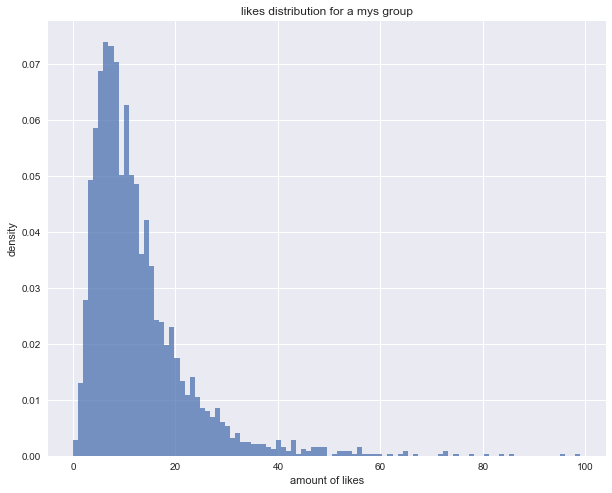

In [35]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)

ax.hist(data_mys[2]['likes'],density=True,bins=100,alpha=0.75)
plt.xlabel('amount of likes')
plt.ylabel('density')
plt.title('likes distribution for a mys group')
plt.show()

# Preparing data for ploting

In [36]:
likes_sci = []
reposts_sci = []
comments_sci = []

likes_sci_norm = []
reposts_sci_norm = []
comments_sci_norm = []

for i in range(len(data_sci)):
    likes_sci.extend(data_sci[i]['likes'])
    reposts_sci.extend(data_sci[i]['reposts'])
    comments_sci.extend(data_sci[i]['comments'])
    
    likes_sci_norm.extend(data_sci[i]['likes_normalized'])
    reposts_sci_norm.extend(data_sci[i]['reposts_normalized'])
    comments_sci_norm.extend(data_sci[i]['comments_normalized'])
    
reactions_sci = [sum(x) for x in [likes_sci,comments_sci]]

In [37]:
likes_mys = []
reposts_mys = []
comments_mys = []

likes_mys_norm = []
reposts_mys_norm = []
comments_mys_norm = []

for i in range(len(data_mys)):
    likes_mys.extend(data_mys[i]['likes'])
    reposts_mys.extend(data_mys[i]['reposts'])
    comments_mys.extend(data_mys[i]['comments'])
    
    likes_mys_norm.extend(data_mys[i]['likes_normalized'])
    reposts_mys_norm.extend(data_mys[i]['reposts_normalized'])
    comments_mys_norm.extend(data_mys[i]['comments_normalized'])
    
reactions_mys = [sum(x) for x in [likes_mys,comments_mys]]

# Calculating CDF, CCDF for all groups in both categories

ALL POSTS COLLECTED FOR 5 YEARS TIMESPAN, DEADLINE FOR POSTS IS GMT: Tuesday, 1 January 2013 00:00:00

In [38]:
# SCIENCE PAGES
# CDF of likes
sci_likes_count = np.bincount(likes_sci)
sci_likes_sum = float(sci_likes_count.sum())
sci_likes_cdf = sci_likes_count.cumsum(0)/sci_likes_sum

sci_likes_count_norm = np.bincount(likes_sci_norm)
sci_likes_sum_norm = float(sci_likes_count_norm.sum())
sci_likes_cdf_norm = sci_likes_count_norm.cumsum(0)/sci_likes_sum_norm

# CCDF of likes
sci_likes_ccdf = 1-sci_likes_cdf
sci_likes_ccdf_norm = 1-sci_likes_cdf_norm

# CDF of reposts
sci_reposts_count = np.bincount(reposts_sci)
sci_reposts_sum = float(sci_reposts_count.sum())
sci_reposts_cdf = sci_reposts_count.cumsum(0)/sci_reposts_sum

sci_reposts_count_norm = np.bincount(reposts_sci_norm)
sci_reposts_sum_norm = float(sci_reposts_count_norm.sum())
sci_reposts_cdf_norm = sci_reposts_count_norm.cumsum(0)/sci_reposts_sum_norm

# CCDF of reposts
sci_reposts_ccdf = 1-sci_reposts_cdf
sci_reposts_ccdf_norm = 1-sci_reposts_cdf_norm

# CDF of comments
sci_comments_count = np.bincount(comments_sci)
sci_comments_sum = float(sci_comments_count.sum())
sci_comments_cdf = sci_comments_count.cumsum(0)/sci_comments_sum

sci_comments_count_norm = np.bincount(comments_sci_norm)
sci_comments_sum_norm = float(sci_comments_count_norm.sum())
sci_comments_cdf_norm = sci_comments_count_norm.cumsum(0)/sci_comments_sum_norm

# CCDF of comments
sci_comments_ccdf = 1-sci_comments_cdf
sci_comments_ccdf_norm = 1-sci_comments_cdf_norm

# CDF of reactions
sci_reactions_count = np.bincount(reactions_sci)
sci_reactions_sum = float(sci_reactions_count.sum())
sci_reactions_cdf = sci_reactions_count.cumsum(0)/sci_reactions_sum

In [39]:
# MYSTERY PAGES
# CDF of likes
mys_likes_count = np.bincount(likes_mys)
mys_likes_sum = float(mys_likes_count.sum())
mys_likes_cdf = mys_likes_count.cumsum(0)/mys_likes_sum

mys_likes_count_norm = np.bincount(likes_mys_norm)
mys_likes_sum_norm = float(mys_likes_count_norm.sum())
mys_likes_cdf_norm = mys_likes_count_norm.cumsum(0)/mys_likes_sum_norm

# CCDF of likes
mys_likes_ccdf = 1-mys_likes_cdf
mys_likes_ccdf_norm = 1-mys_likes_cdf_norm

# CDF of reposts
mys_reposts_count = np.bincount(reposts_mys)
mys_reposts_sum = float(mys_reposts_count.sum())
mys_reposts_cdf = mys_reposts_count.cumsum(0)/mys_reposts_sum

mys_reposts_count_norm = np.bincount(reposts_mys_norm)
mys_reposts_sum_norm = float(mys_reposts_count_norm.sum())
mys_reposts_cdf_norm = mys_reposts_count_norm.cumsum(0)/mys_reposts_sum_norm

# CCDF of reposts
mys_reposts_ccdf = 1-mys_reposts_cdf
mys_reposts_ccdf_norm = 1-mys_reposts_cdf_norm

# CDF of comments
mys_comments_count = np.bincount(comments_mys)
mys_comments_sum = float(mys_comments_count.sum())
mys_comments_cdf = mys_comments_count.cumsum(0)/mys_comments_sum

mys_comments_count_norm = np.bincount(comments_mys_norm)
mys_comments_sum_norm = float(mys_comments_count_norm.sum())
mys_comments_cdf_norm = mys_comments_count_norm.cumsum(0)/mys_comments_sum_norm

# CCDF of comments
mys_comments_ccdf = 1-mys_comments_cdf
mys_comments_ccdf_norm = 1-mys_comments_cdf_norm

# Plotting CCDF to understanding consumption patterns

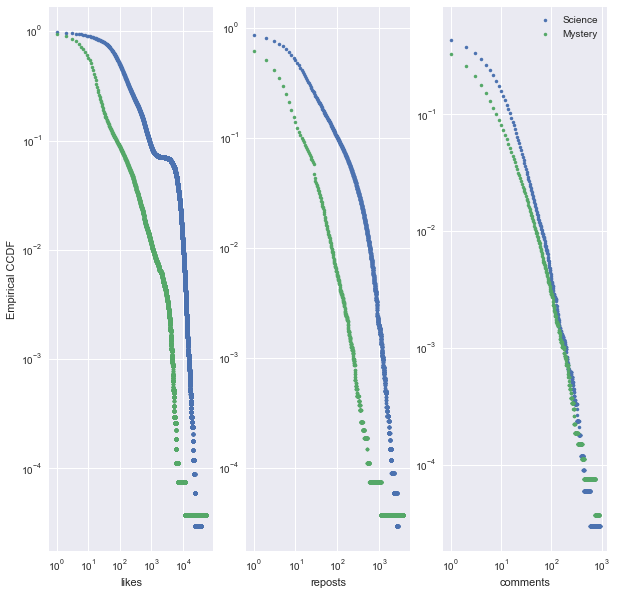

In [40]:
fig = plt.figure()
fig.set_size_inches(10,10)

ax1 = fig.add_subplot(131)
ax1.plot(range(len(sci_likes_ccdf)),sci_likes_ccdf,'.')
ax1.plot(range(len(mys_likes_ccdf)),mys_likes_ccdf,'.')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Empirical CCDF')
plt.xlabel('likes')

ax2 = fig.add_subplot(132)
ax2.plot(range(len(sci_reposts_ccdf)),sci_reposts_ccdf,'.')
ax2.plot(range(len(mys_reposts_ccdf)),mys_reposts_ccdf,'.')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('reposts')

ax3 = fig.add_subplot(133)
ax3.plot(range(len(sci_comments_ccdf)),sci_comments_ccdf,'.',label='Science')
ax3.plot(range(len(mys_comments_ccdf)),mys_comments_ccdf,'.',label='Mystery')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('comments')
plt.legend()

plt.show()

# Data description table

In [53]:
print('Pages:\n\nSCI:\t'+str(len(data_sci))+'\nMYS:\t'+str(len(data_mys))+'\nTotal:\t'+str(len(data_sci)+len(data_mys)))
print('\nPosts:\n\nSCI:\t'+str(len(likes_sci))+'\nMYS:\t'+str(len(likes_mys))+'\nTotal:\t'+str(len(likes_sci)+len(likes_mys)))
print('\nReposts:\n\nSCI:\t'+str(sum(reposts_sci))+'\nMYS:\t'+str(sum(reposts_mys))+'\nTotal:\t'+str(sum(reposts_sci)+sum(reposts_mys)))
print('\nLikes:\n\nSCI:\t'+str(sum(likes_sci))+'\nMYS:\t'+str(sum(likes_mys))+'\nTotal:\t'+str(sum(likes_sci)+sum(likes_mys)))

Pages:

SCI:	14
MYS:	16
Total:	30

Posts:

SCI:	33600
MYS:	26797
Total:	60397

Reposts:

SCI:	1507428
MYS:	189233
Total:	1696661

Likes:

SCI:	23517441
MYS:	1823681
Total:	25341122


In [78]:
for i in range(len(data_mys)):
    print(max(data_mys[i]['reposts']))

20
34
26
54
23
147
150
48
520
26
10
55
78
3660
146
32


In [50]:
x = [x['id'] for x in data_mys if max(x['reposts'])==34]

In [51]:
print(x)

['-3403']


In [40]:
len(data_mys[8]['ids'])

2500

# Sharing Trees Social Network
